In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

In [3]:
plt.style.use('ggplot')

In [4]:
dataset = pd.read_csv('tr_covid_en.csv',sep=';', index_col=0)

In [5]:
dataset.head()

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
date,,,,,,
11.03.2020,0,1,0,0,0,0
12.03.2020,0,0,0,0,0,0
13.03.2020,0,4,0,0,0,0
14.03.2020,0,0,0,0,0,0
15.03.2020,2800,1,0,0,0,0


In [6]:
dataset.index=pd.to_datetime(dataset.index, format='%d.%m.%Y')

In [7]:
type(dataset.index[0])

pandas._libs.tslibs.timestamps.Timestamp

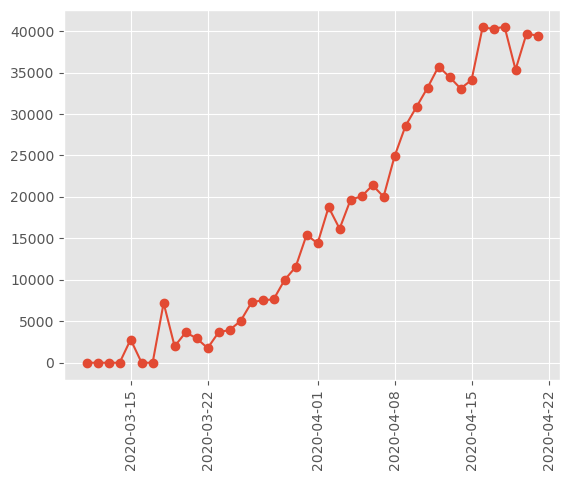

In [8]:
plt.plot(dataset.index.values,dataset.num_tests.values,marker='o')
plt.xticks(rotation=90);

In [9]:
dataset.columns.tolist()

['num_tests',
 'num_case',
 'total_intensive_care',
 'total_intubated',
 'num_recovered',
 'num_deaths']

0 num_tests
1 num_case
2 total_intensive_care
3 total_intubated
4 num_recovered
5 num_deaths


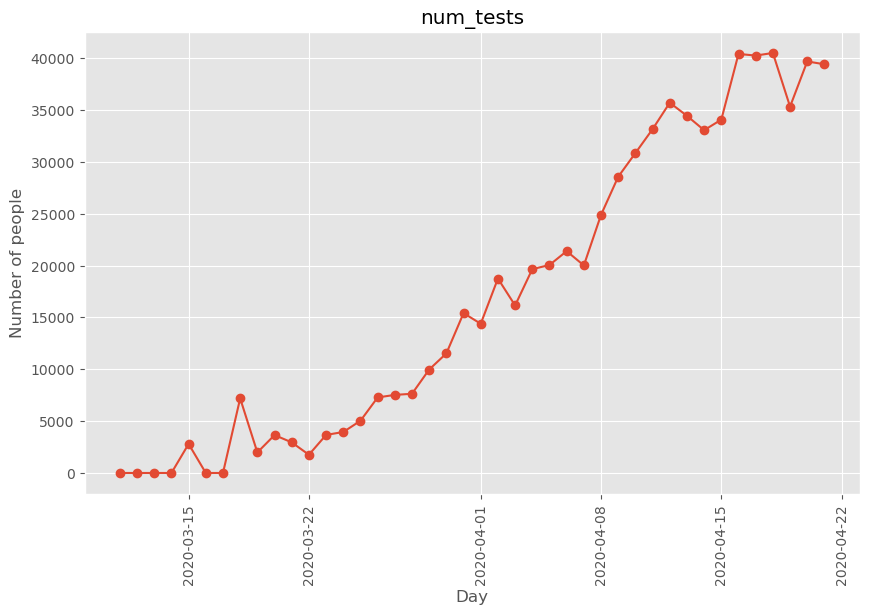

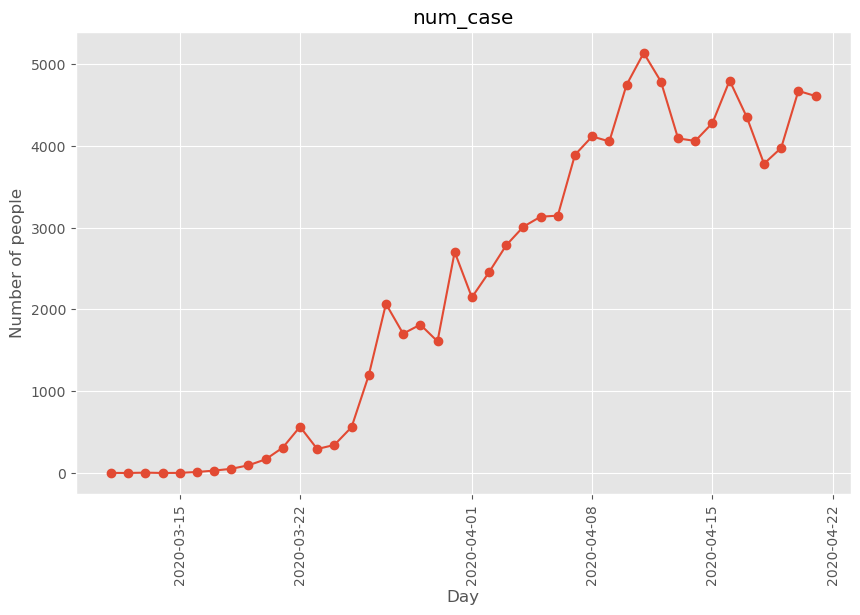

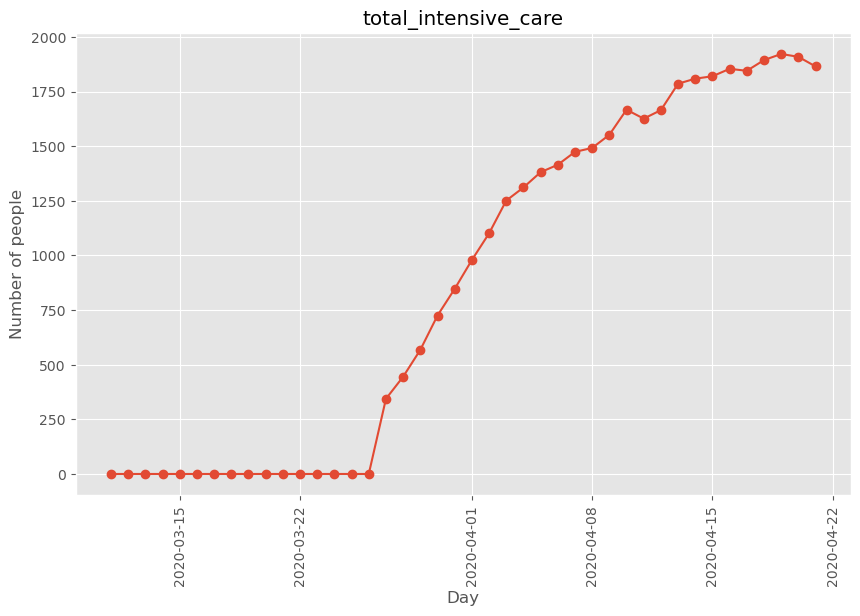

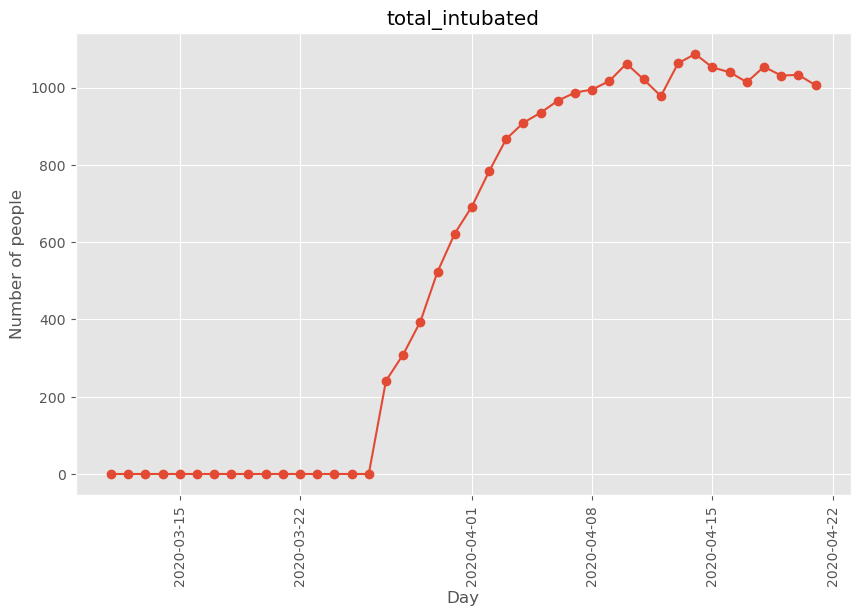

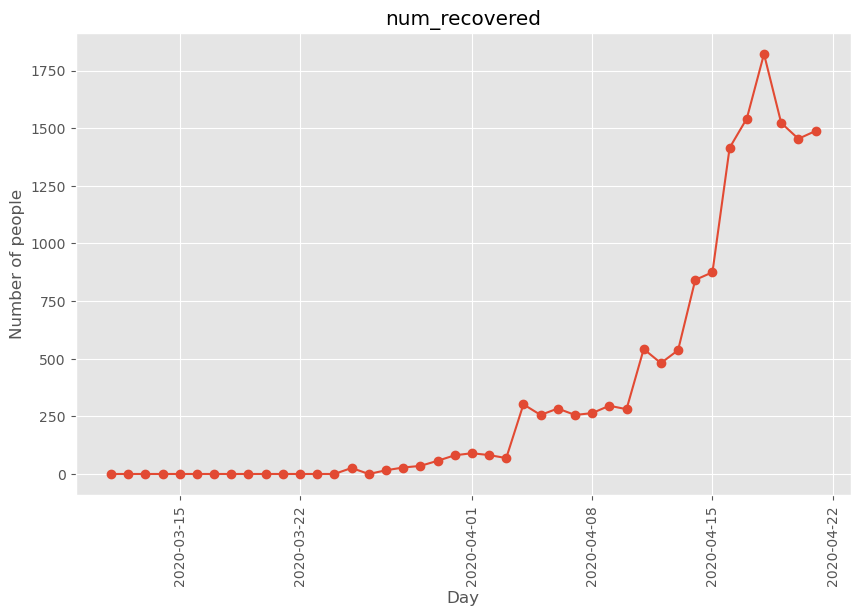

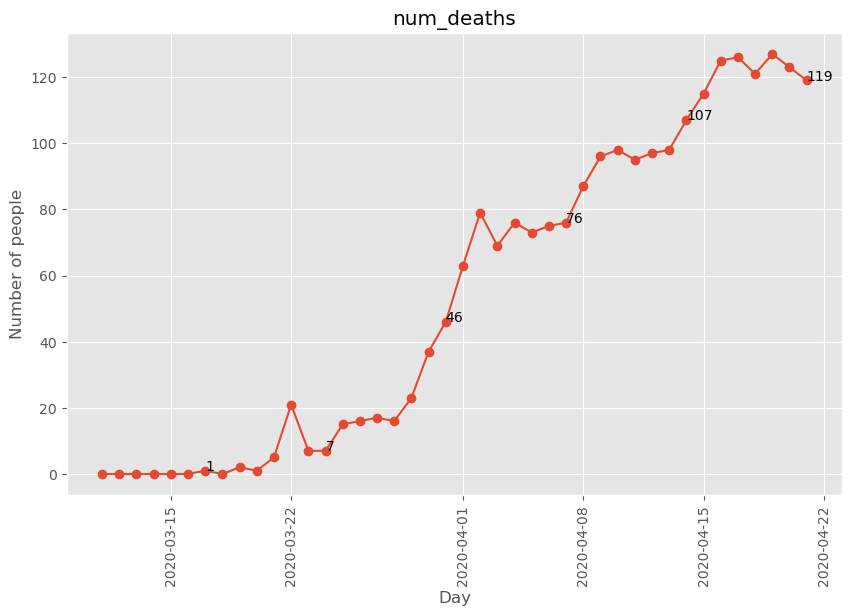

In [10]:
counter=0
for i,col in enumerate(dataset.columns.tolist()):
    print(i,col)
    plt.figure(figsize=(10, 6))
    x_axis = dataset.index.values
    y_axis = dataset[col].values
    plt.plot(x_axis, y_axis, label=col,marker='o')
    plt.title(col)
    plt.xlabel("Day")
    plt.ylabel("Number of people")
    plt.xticks(rotation=90)
for j, k in zip(x_axis, y_axis):
    counter += 1
    if counter%7==0:
        plt.annotate(str(k), xy=(j, k));

In [11]:
dataset_shifted=dataset.iloc[9:,:]

In [12]:
dataset_shifted.head()

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
date,,,,,,
2020-03-20,3656,167,0,0,0,1
2020-03-21,2953,311,0,0,0,5
2020-03-22,1758,566,0,0,0,21
2020-03-23,3672,293,0,0,0,7
2020-03-24,3952,343,0,0,0,7


In [13]:
dataset_shifted.describe()

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,21255.484848,2890.878788,1107.484848,687.303030,452.848485,68.363636
std,13421.055955,1595.323728,724.413518,424.414559,571.175275,43.126136
min,1758.000000,167.000000,0.000000,0.000000,0.000000,1.000000
25%,7641.000000,1704.000000,445.000000,309.000000,28.000000,21.000000
50%,20023.000000,3135.000000,1381.000000,935.000000,256.000000,76.000000
75%,34090.000000,4117.000000,1786.000000,1021.000000,542.000000,98.000000
max,40520.000000,5138.000000,1922.000000,1087.000000,1822.000000,127.000000


In [14]:
scaler=MinMaxScaler()
dataset_scaled=scaler.fit_transform(dataset_shifted.values)

In [15]:
dataset_scaled.round(2)

array([[0.05, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.03, 0.03, 0.  , 0.  , 0.  , 0.03],
       [0.  , 0.08, 0.  , 0.  , 0.  , 0.16],
       [0.05, 0.03, 0.  , 0.  , 0.  , 0.05],
       [0.06, 0.04, 0.  , 0.  , 0.  , 0.05],
       [0.08, 0.08, 0.  , 0.  , 0.01, 0.11],
       [0.14, 0.21, 0.  , 0.  , 0.  , 0.12],
       [0.15, 0.38, 0.18, 0.22, 0.01, 0.13],
       [0.15, 0.31, 0.23, 0.28, 0.02, 0.12],
       [0.21, 0.33, 0.3 , 0.36, 0.02, 0.17],
       [0.25, 0.29, 0.38, 0.48, 0.03, 0.29],
       [0.35, 0.51, 0.44, 0.57, 0.04, 0.36],
       [0.33, 0.4 , 0.51, 0.64, 0.05, 0.49],
       [0.44, 0.46, 0.57, 0.72, 0.05, 0.62],
       [0.37, 0.53, 0.65, 0.8 , 0.04, 0.54],
       [0.46, 0.57, 0.68, 0.84, 0.17, 0.6 ],
       [0.47, 0.6 , 0.72, 0.86, 0.14, 0.57],
       [0.51, 0.6 , 0.74, 0.89, 0.16, 0.59],
       [0.47, 0.75, 0.77, 0.91, 0.14, 0.6 ],
       [0.6 , 0.79, 0.78, 0.92, 0.14, 0.68],
       [0.69, 0.78, 0.81, 0.94, 0.16, 0.75],
       [0.75, 0.92, 0.87, 0.98, 0.15, 0.77],
       [0.

In [16]:
dataset_scaled=pd.DataFrame(dataset_scaled,columns=dataset.columns)

In [17]:
dataset_scaled.index= dataset_shifted.index

In [18]:
dataset_scaled.head()

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
date,,,,,,
2020-03-20,0.048965,0.000000,0.0,0.0,0.0,0.000000
2020-03-21,0.030829,0.028968,0.0,0.0,0.0,0.031746
2020-03-22,0.000000,0.080266,0.0,0.0,0.0,0.158730
2020-03-23,0.049378,0.025347,0.0,0.0,0.0,0.047619
2020-03-24,0.056602,0.035405,0.0,0.0,0.0,0.047619


In [19]:
corr = dataset_scaled.corr()

In [20]:
corr

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
num_tests,1.000000,0.939266,0.956330,0.899342,0.854870,0.973720
num_case,0.939266,1.000000,0.958863,0.946025,0.673708,0.931931
total_intensive_care,0.956330,0.958863,1.000000,0.984560,0.745196,0.977441
total_intubated,0.899342,0.946025,0.984560,1.000000,0.629068,0.939364
num_recovered,0.854870,0.673708,0.745196,0.629068,1.000000,0.820568
num_deaths,0.973720,0.931931,0.977441,0.939364,0.820568,1.000000


In [21]:
dataset.head(10)

,num_tests,num_case,total_intensive_care,total_intubated,num_recovered,num_deaths
date,,,,,,
2020-03-11,0,1,0,0,0,0
2020-03-12,0,0,0,0,0,0
2020-03-13,0,4,0,0,0,0
2020-03-14,0,0,0,0,0,0
2020-03-15,2800,1,0,0,0,0
2020-03-16,0,12,0,0,0,0
2020-03-17,0,29,0,0,0,1
2020-03-18,7197,51,0,0,0,0
2020-03-19,1981,94,0,0,0,2


<Axes: >

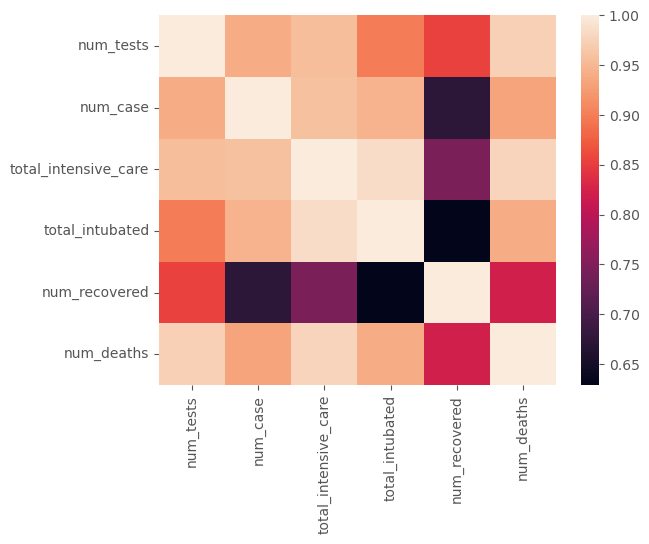

In [22]:
heatmap(corr,xticklabels=dataset.columns,yticklabels=dataset.columns)

In [23]:
X=dataset_scaled.iloc[:,[1,4]]
y=dataset_scaled.iloc[:,[2,3]]

In [24]:
y

,total_intensive_care,total_intubated
date,,
2020-03-20,0.000000,0.000000
2020-03-21,0.000000,0.000000
2020-03-22,0.000000,0.000000
2020-03-23,0.000000,0.000000
2020-03-24,0.000000,0.000000
2020-03-25,0.000000,0.000000
2020-03-26,0.000000,0.000000
2020-03-27,0.178980,0.221711
2020-03-28,0.231530,0.284269


### Up to this point, we have completed the preprocessing step.

In [26]:
mlp= MLPRegressor(hidden_layer_sizes=(75,),max_iter=10000,learning_rate_init=0.05,random_state=42)
mlp.fit(X.values,y.values)

MLPRegressor(hidden_layer_sizes=(75,), learning_rate_init=0.05, max_iter=10000,
             random_state=42)

In [27]:
y_predicted=mlp.predict(X.values)

In [28]:
y_predicted

array([[-0.05704642, -0.08922999],
       [-0.02844771, -0.053589  ],
       [ 0.02219585,  0.00952525],
       [-0.03202255, -0.05804413],
       [-0.02209244, -0.04566878],
       [ 0.04871273,  0.05122549],
       [ 0.14749413,  0.16555758],
       [ 0.34710418,  0.41533857],
       [ 0.28257235,  0.34018217],
       [ 0.31337536,  0.38028147],
       [ 0.29423264,  0.36458569],
       [ 0.55086014,  0.68738737],
       [ 0.44242928,  0.55722691],
       [ 0.49929512,  0.62438911],
       [ 0.55552127,  0.68908944],
       [ 0.6590556 ,  0.79570658],
       [ 0.66957281,  0.80903302],
       [ 0.67493436,  0.81078434],
       [ 0.77162126,  0.89459649],
       [ 0.80298386,  0.92010872],
       [ 0.79888532,  0.91353612],
       [ 0.89078768,  0.99012984],
       [ 0.97915379,  1.03295267],
       [ 0.92338901,  0.99458762],
       [ 0.83605249,  0.91793058],
       [ 0.87066569,  0.91108302],
       [ 0.90457975,  0.93461003],
       [ 1.04037561,  0.98083254],
       [ 0.99596115,

In [29]:
y.values

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.17898023, 0.22171113],
       [0.23152966, 0.28426863],
       [0.29552549, 0.3624655 ],
       [0.37721124, 0.48114075],
       [0.44068678, 0.57221711],
       [0.50936524, 0.63661454],
       [0.57284079, 0.72033119],
       [0.6508845 , 0.7976081 ],
       [0.68210198, 0.83624655],
       [0.71852237, 0.86016559],
       [0.73621228, 0.88868445],
       [0.76690947, 0.90800368],
       [0.77627471, 0.91536339],
       [0.8074922 , 0.93560258],
       [0.8673257 , 0.97700092],
       [0.84599376, 0.93928243],
       [0.86628512, 0.89972401],
       [0.92924037, 0.97792088],
       [0.94120708, 1.        ],
       [0.94693028, 0.96780129],
       [0.96462019, 0.95676173],
       [0.95993757, 0.93284269],
       [0.98543184, 0.96964121],
       [1.

In [30]:
mean_squared_error(y.values,y_predicted)

0.005340620984241116

In [31]:
r2_score(y.values,y_predicted)

0.962678918750649

In [32]:
mlp.coefs_[0].round(2)

array([[-0.55,  0.26,  0.  , -0.16, -0.39,  0.01, -0.53, -0.16,  0.  ,
        -0.18, -0.21,  0.49,  0.32, -0.24,  0.01, -0.26, -0.  ,  0.  ,
        -0.  , -0.13,  0.22,  0.01, -0.35,  0.  , -0.09, -0.  , -0.07,
         0.  , -0.29, -0.01, -0.  ,  0.01, -0.57,  0.13, -0.04,  0.24,
        -0.43, -0.52,  0.09, -0.  ,  0.  , -0.55, -0.49, -0.05, -0.  ,
         0.14, -0.41, -0.33,  0.16, -0.61,  0.4 ,  0.02, -0.08,  0.2 ,
        -0.25,  0.  ,  0.  , -0.24, -0.01, -0.  , -0.33, -0.42,  0.26,
         0.  , -0.42, -0.27, -0.19,  0.12, -0.46,  0.4 ,  0.19, -0.43,
        -0.01, -0.12,  0.  ],
       [-0.16, -0.09, -0.  , -0.27, -0.86, -0.01, -0.21, -0.48, -0.  ,
        -0.41, -0.21,  0.35,  0.3 ,  0.17,  0.  , -0.35,  0.  ,  0.  ,
         0.  ,  0.18,  0.16,  0.  , -0.  , -0.01, -0.35, -0.01,  0.31,
        -0.  , -0.32, -0.  , -0.  , -0.  , -0.14, -0.31, -0.53, -0.25,
        -0.49, -0.06, -0.04, -0.  , -0.01, -0.33, -1.46, -0.08, -0.  ,
         0.19, -0.1 , -0.45, -0.03, -0.22,  0.1

In [33]:
mlp.intercepts_

[array([-0.34807287,  0.07209708, -0.19825183, -0.3492062 ,  0.26917149,
        -0.1440081 , -0.0348794 , -0.32757356, -0.14647447, -0.04303863,
        -0.32960869,  0.15420971,  0.09536544, -0.45808058, -0.22873734,
        -0.12571818, -0.10005679, -0.17501375, -0.25638089, -0.25291298,
         0.07601236, -0.26988444, -0.29275101, -0.15269482, -0.10872383,
        -0.18179814, -0.07120347, -0.06323458, -0.12159667, -0.20236862,
        -0.08873115, -0.21579407, -0.10134007,  0.1360771 , -0.434648  ,
        -0.07260023, -0.13292528, -0.26869212, -0.18669255, -0.14412142,
        -0.22716687, -0.3873794 ,  0.36643258, -0.12961531, -0.08986814,
        -0.1490529 , -0.08988312, -0.14051884,  0.15220766, -0.33003645,
         0.08547389, -0.37202145, -0.50934092,  0.16347067, -0.20728203,
        -0.27401064, -0.22249466,  0.24160835, -0.27631943, -0.18936765,
        -0.29860145, -0.05992743, -0.05214584, -0.15393783, -0.07734605,
        -0.4461963 , -0.45719702, -0.03583762, -0.1

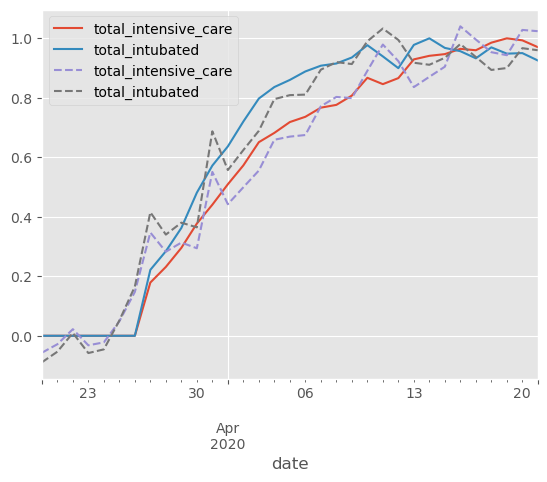

In [34]:
ax=y.plot(linestyle='-')
pd.DataFrame(y_predicted,columns=y.columns,index=y.index).plot(ax=ax,linestyle='--')
plt.legend()